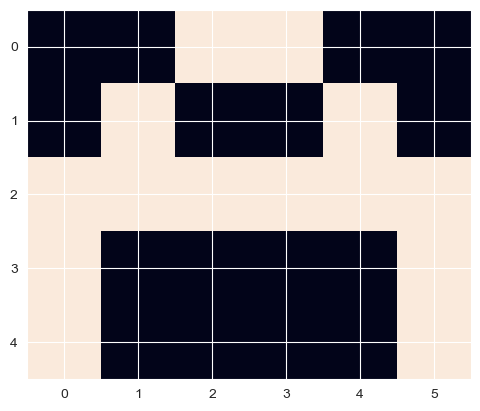

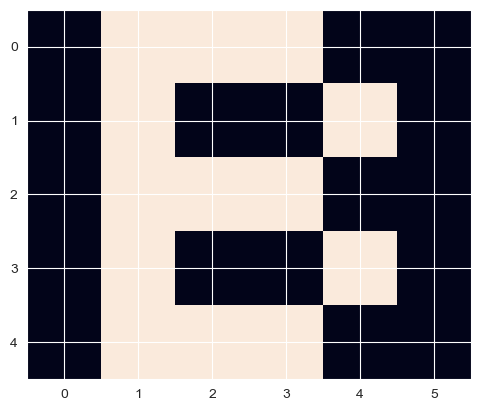

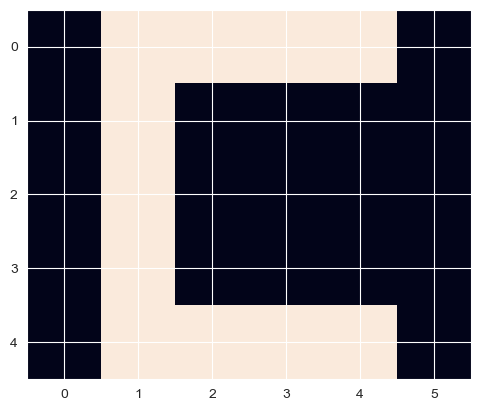

In [2]:
## 这是个demo numpy实现dnn
## https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/

import numpy as np
import matplotlib.pyplot as plt

# Creating data set

# A
a = [
    0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1
]
# B
b = [
    0, 1, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 0, 0
]
# C
c = [
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0
]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()
plt.imshow(np.array(b).reshape(5, 6))
plt.show()
plt.imshow(np.array(c).reshape(5, 6))
plt.show()


In [3]:
x = [
    np.array(a).reshape(1, 30),
    np.array(b).reshape(1, 30),
    np.array(c).reshape(1, 30),
]
y = np.array(y)

In [4]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2

	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2

	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)

	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))

	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()




In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[ 0.73574503  0.93541069 -1.34422497  1.26442862 -0.19439177]
 [ 0.54427586  0.53016465  0.68977108  0.08783389 -0.55483997]
 [-1.68161786  0.59712122  1.0754623   0.23347124 -1.07233189]
 [ 0.04423364  0.65585799 -0.15298115 -0.17840614 -1.93783015]
 [ 1.36909439  0.97957408 -0.70576569  0.56495504 -0.75504809]
 [-1.60214787  0.16594758  1.15377776  0.07446636 -0.38180962]
 [-0.41581827 -0.44726546 -0.28434047 -0.12864962  1.70651715]
 [ 1.14728278 -0.70320393 -2.08988276  0.78672762 -0.77518209]
 [ 0.52132023 -0.74102458 -0.35984804 -1.901489   -0.56877538]
 [ 0.88088924 -0.40507332  0.58171374 -0.41173548  0.73494162]
 [ 0.99539027  1.33566929  0.56293402 -0.98510136 -0.02981559]
 [ 0.14652011  1.05278583  0.28000816 -1.6324698   0.20116885]
 [ 0.05224871 -0.16597604  0.18681315 -1.46965932 -0.38117268]
 [ 0.79259514 -0.03186459  0.71073084  1.14394601 -0.26611632]
 [-0.8576777   0.08864007 -1.62639233 -0.24590312 -1.26750109]
 [ 0.67143094  0.36236907 -1.57798611  0.5746878  -0.45

In [6]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 66.56182544172995
epochs: 2 ======== acc: 68.90010287014428
epochs: 3 ======== acc: 70.91152193067617
epochs: 4 ======== acc: 72.54299280110908
epochs: 5 ======== acc: 73.82509586332844
epochs: 6 ======== acc: 74.827960428811
epochs: 7 ======== acc: 75.62504111296596
epochs: 8 ======== acc: 76.27690220567293
epochs: 9 ======== acc: 76.82836578244209
epochs: 10 ======== acc: 77.31099372957814
epochs: 11 ======== acc: 77.74659507770747
epochs: 12 ======== acc: 78.15022542054822
epochs: 13 ======== acc: 78.53239000620196
epochs: 14 ======== acc: 78.9005642833517
epochs: 15 ======== acc: 79.26021658139588
epochs: 16 ======== acc: 79.61548914871463
epochs: 17 ======== acc: 79.9696489186405
epochs: 18 ======== acc: 80.32538142648879
epochs: 19 ======== acc: 80.68497365631971
epochs: 20 ======== acc: 81.05041246266026
epochs: 21 ======== acc: 81.4234124717028
epochs: 22 ======== acc: 81.80538004598436
epochs: 23 ======== acc: 82.19731854294643
epochs: 24 ======== acc: 

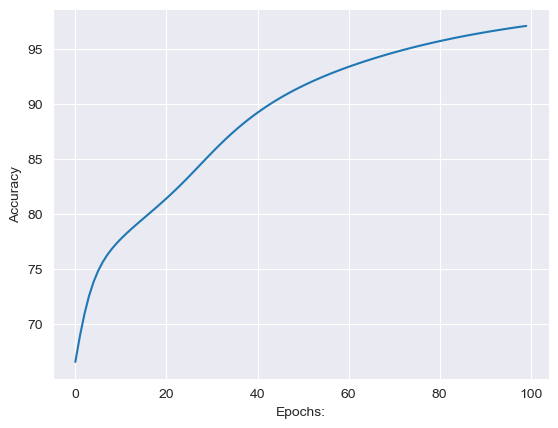

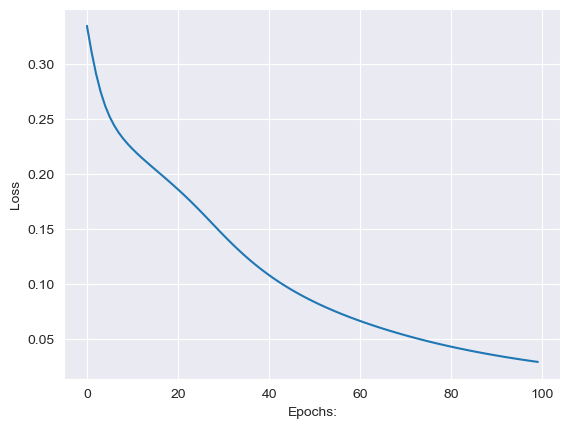

In [7]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [8]:
# the trained weights are
print(w1, "\n", w2)


[[ 0.73574503  0.93541069 -1.34422497  1.26442862 -0.19439177]
 [ 0.54780231  0.42609576  0.81604613  0.07841795 -0.56177827]
 [-1.51365958  0.47110349  1.07880366 -0.25424713 -1.07862796]
 [ 0.21219192  0.52984026 -0.14963979 -0.6661245  -1.94412622]
 [ 1.39129912  0.39909116 -0.59529376 -0.67390516 -0.76207543]
 [-1.60214787  0.16594758  1.15377776  0.07446636 -0.38180962]
 [-0.41581827 -0.44726546 -0.28434047 -0.12864962  1.70651715]
 [ 1.31524106 -0.82922167 -2.0865414   0.29900926 -0.78147815]
 [ 0.52132023 -0.74102458 -0.35984804 -1.901489   -0.56877538]
 [ 0.88088924 -0.40507332  0.58171374 -0.41173548  0.73494162]
 [ 1.14114383  1.79013447  0.45580345 -0.23395952 -0.02908431]
 [ 0.14652011  1.05278583  0.28000816 -1.6324698   0.20116885]
 [ 0.21668055 -0.18792487  0.06387946 -1.94796175 -0.38053044]
 [ 0.96055342 -0.15788232  0.7140722   0.65622764 -0.27241238]
 [-0.71192414  0.54310526 -1.73352289  0.50523871 -1.26676981]
 [ 0.81718449  0.81683425 -1.68511668  1.32582964 -0.45

Image is of letter B.


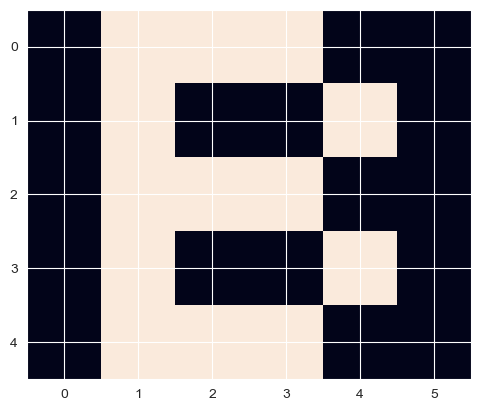

In [9]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)
